In [ ]:
!pip install spotipy 

In [ ]:
import pandas as pd

In [ ]:
sp_data = pd.read_csv("data/tracks_features.csv")

In [ ]:
sp_data.describe()

In [ ]:
import spotipy

In [76]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


class SpotifyPopularityCrawler:

    POPULARITY_KEY = "popularity"

    def __init__(self, sp_data: pd.DataFrame, REQUEST_LIMIT=None):
        # login
        self.spotify = spotipy.Spotify(
            client_credentials_manager=SpotifyClientCredentials()
        )
        self.sp_data = sp_data
        
        self.REQUEST_LIMIT = sp_data.shape[0] if REQUEST_LIMIT == None else REQUEST_LIMIT

    def augment_data_with_popularity(self):        
        self.get_popularity_of_all_songs()
        small_frame = pd.DataFrame()
        if self.REQUEST_LIMIT > 0:
            small_frame = self.sp_data.iloc[0:self.REQUEST_LIMIT]
            small_frame['popularity'] = self.popularities
        return small_frame
        
    
    def get_popularity_of_all_songs(self):
        popularities = []
        for track in sp_data.to_numpy()[0:self.REQUEST_LIMIT]:
            key = track[0]            
            try:
                pop = self.get_popularity_of_song(key)
                popularities.append(pop)
            except Exception as e:
                print(e)
        self.popularities = popularities

    def get_popularity_of_song(self, song_id):
        result = self.spotify.track(song_id)
        pop = result[self.POPULARITY_KEY]
        return pop


In [89]:
crawler = SpotifyPopularityCrawler(sp_data, REQUEST_LIMIT=1000)

aug_data = crawler.augment_data_with_popularity()

/usr/local/Caskroom/miniconda/base/envs/datlit/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [90]:
aug_data.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,popularity
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.47,...,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02,66


(array([468., 155., 117., 107.,  56.,  47.,  30.,  12.,   3.,   5.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

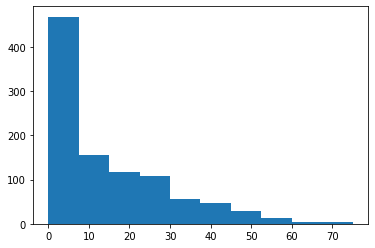

In [91]:
import matplotlib.pyplot as plt


plt.hist(aug_data['popularity'])